In [409]:
import pandas as pd

In [410]:
data = pd.read_csv('data')
data = pd.DataFrame(data)
data.head()

,Unnamed: 0,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_css_class,author_flair_template_id,author_flair_text,banned_at_utc,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,0,NaN,NaN,False,jellybeanpie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LPT: If you really want to connect with someon...,17851,https://www.reddit.com/r/LifeProTips/comments/...,[],NaN,False,all_ads,6.0
1,1,NaN,NaN,False,TheFirstMultimate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Seeing a [deleted] comment is like arriving la...,27056,https://www.reddit.com/r/Showerthoughts/commen...,[],NaN,False,all_ads,6.0
2,2,NaN,NaN,False,Figsnbacon,NaN,NaN,NaN,NaN,NaN,...,140.0,140.0,Heartbroken she couldn’t win the TRex in the c...,15606,https://i.redd.it/rewlox8jm2011.jpg,[],NaN,False,all_ads,6.0
3,3,NaN,NaN,False,jessejamess,NaN,NaN,NaN,NaN,NaN,...,78.0,140.0,Double Cork Dome Drag,12815,https://gfycat.com/ForsakenMediumClownanemonefish,[],NaN,False,all_ads,6.0
4,4,NaN,NaN,False,waterunderwind,1.0,NaN,NaN,NaN,NaN,...,140.0,140.0,"TIL: albino sequoias, A tree that can’t produc...",1877,https://ascendenza.files.wordpress.com/2011/02...,[],NaN,False,promo_adult,1.0


In [411]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()
data.shape

(22580, 85)

In [412]:
#Predicting binary variable: low vs high comments
    #low defined as <= median number of comments/post: <= 12
    #high defined as > median number of comments/post: > 12
    
import numpy as np

median_comments = np.median(data['num_comments'])
median_comments

12.0

In [413]:
#Add in binary label as target in dataset
data['binary_comments'] = [False if i <= 12 else True for i in data['num_comments']]
data['binary_comments'].head()

#check values
    #51% of posts labeled low: False (inclusive of 12)
    #49% of posts labeled high: True (exclusive of 12)
data['binary_comments'].value_counts()


False    11593
True     10987
Name: binary_comments, dtype: int64

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


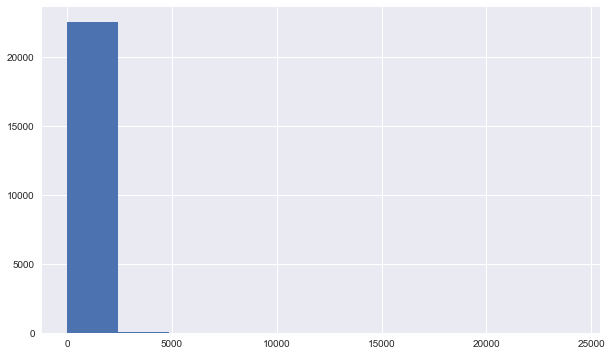

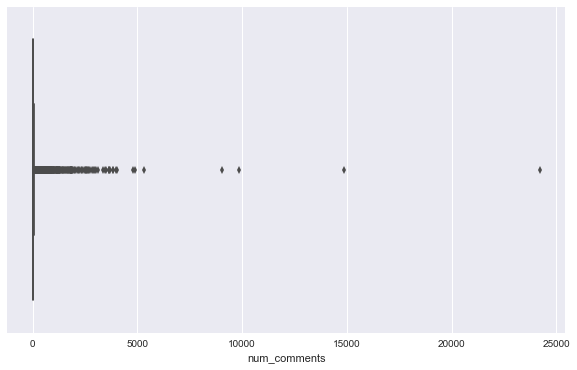

In [414]:
#Plot distribution of num_comments/post
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10, 6))
plt.hist(data['num_comments']);

fig = plt.figure(figsize = (10, 6))
sns.boxplot(data['num_comments']);

In [415]:
#baseline accuracy for model is % of high comments
baseline = data['binary_comments'].value_counts()[1] / (len(data['binary_comments']))
baseline

0.4865810451727192

In [416]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

<class 'pandas.core.series.Series'>


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


funny                   89
aww                     81
gaming                  66
pics                    63
memes                   62
FortNiteBR              61
PrequelMemes            58
PewdiepieSubmissions    55
gifs                    55
LiverpoolFC             51
Showerthoughts          50
mildlyinteresting       50
rupaulsdragrace         50
todayilearned           47
DDLC                    46
DeepFriedMemes          45
oddlysatisfying         44
greatawakening          43
LivestreamFail          43
AskReddit               42
tumblr                  42
MemeEconomy             41
BlackPeopleTwitter      40
FireEmblemHeroes        40
CringeAnarchy           39
wholesomememes          39
OldSchoolCool           37
greentext               37
interestingasfuck       36
cursedimages            36
                        ..
CompanyOfHeroes          1
dubai                    1
Dirtbikes                1
Wrasslin                 1
TibiaMMO                 1
gurrenlagann             1
H

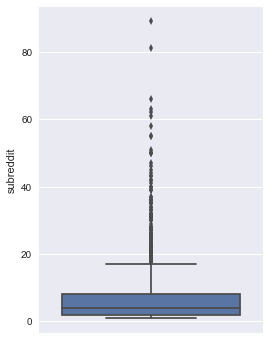

In [417]:
#set feature and target variables
X = data['subreddit']
y = data['binary_comments']

fig = plt.figure(figsize = (4, 6))
sns.boxplot(X.value_counts(), orient = 'v');

print(type(X))
X.value_counts()
#data[data['subreddit'] == 'funny']

In [421]:
#additional step: group similar subreddits

#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()
#X_lemma = [lemmatizer.lemmatize(i) for i in X]
#for i in X:
#    print (i, lemmatizer.lemmatize(i))

#CountVectorize feature set
cv = CountVectorizer(stop_words = 'english')
cv.fit(X)
cv_X = cv.fit_transform(X)
cv_X_array = cv_X.toarray()

print('cv_X:', type(cv_X))
print('cv_X_array:', type(cv_X_array))
print(cv_X_array.shape, y.shape)


cv_X: <class 'scipy.sparse.csr.csr_matrix'>
cv_X_array: <class 'numpy.ndarray'>
(22580, 3734) (22580,)


In [420]:
#train-test-split dataset
cv_X_train, cv_X_test, y_train, y_test = train_test_split(cv_X_array, y, test_size = 0.3)

print(cv_X_train.shape, y_train.shape)
print(cv_X_test.shape, y_test.shape)


(15806, 3734) (15806,)
(6774, 3734) (6774,)


In [422]:
#classify using logistic regression
lr = LogisticRegression()
lr.fit(cv_X_train, y_train)
print('train:', lr.score(cv_X_train, y_train))

print('test:', lr.score(cv_X_test, y_test))

train: 0.7967227635075288
test: 0.7170062001771479


In [424]:
rf = RandomForestClassifier()
rf.fit(cv_X_train, y_train)
print('train:', rf.score(cv_X_train, y_train))

print('test:', rf.score(cv_X_test, y_test))

train: 0.7923573326584841
test: 0.683348095659876


In [425]:
#Adding in new variables for thread title
    #1. binary variable if 'cat' or 'funny' appears in title
    #2. numerical variable for length of title: number of words
    #3. numerical variable for intensity of title: punctuation - ?s and !s
    #4. additional step: creating dictionary of words for classifying positive/negative sentiment


In [426]:
#1. binary variable if 'cat' or 'funny' appears in title
import numpy as np
binary_variable = [1 if ('cat' in i) or ('funny' in i) else 0 for i in data['title']]
binary_variable = pd.Series(binary_variable)

data['binary_variable'] = binary_variable
data['binary_variable'].value_counts()

#i = data['title'][0]
#for i in data['title']:
#    if ('cat' or 'funny') in i:
#        print (i, True)
        
#returns df rows for condition: np.where(data['title'].str.contains('cat'))


0    22273
1      307
Name: binary_variable, dtype: int64

In [427]:
#checking for 'cat' and 'funny'

#X['cat_variable'] = data['title'].str.contains('cat')
#X['funny_variable'] = data['title'].str.contains('funny')

#print(X['cat_variable'].value_counts())
#print ('\n')
#print(X['funny_variable'].value_counts())

In [478]:
#CountVectorizer with binary_variable
X = data['subreddit']

cv = CountVectorizer(stop_words = 'english')
cv.fit(X)
cv_X = cv.fit_transform(X)
cv_X_array = cv_X.toarray()

print(cv_X_array.shape)

(22580, 3734)


In [479]:
cv_X = pd.DataFrame(cv_X_array)
cv_X['binary_variable'] = data['binary_variable']
print(cv_X.shape)


(22580, 3735)


In [480]:
#train-test-split dataset
cv_X_train, cv_X_test, y_train, y_test = train_test_split(cv_X, y, test_size = 0.3)

print(cv_X_train.shape, y_train.shape)
print(cv_X_test.shape, y_test.shape)

(15806, 3735) (15806,)
(6774, 3735) (6774,)


In [481]:
#Random Forest classifier with binary_variable
rf = RandomForestClassifier()
rf.fit(cv_X_train, y_train)
print('train:', rf.score(cv_X_train, y_train))

print('test:', rf.score(cv_X_test, y_test))

train: 0.7954574212324433
test: 0.6772955417773842


In [482]:
#Binary variable did not improve model...decreased performance

In [483]:
#2. numerical variable for length of title: number of words
    #additional step: categorize into bins

data['num_variable'] = [len(i.split()) for i in data['title']]
data['num_variable'].value_counts().head()

5    2020
4    1986
3    1924
6    1824
7    1693
Name: num_variable, dtype: int64

In [484]:
#3. numerical variable for intensity of title: punctuation - ?s and !s
data['intensity_variable'] = [(i.count('!') + i.count('?')) for i in data['title']]
data['intensity_variable'].value_counts()

#for i in data['title']:
#    print(i.count('!') + i.count('?'))

0     18835
1      3153
2       378
3       138
4        42
5        15
6        10
7         3
9         2
8         2
10        1
20        1
Name: intensity_variable, dtype: int64

In [485]:
cv_X['num_variable'] = data['num_variable']
cv_X['intensity_variable'] = data['intensity_variable']

print(cv_X.shape)
cv_X.head()


(22580, 3737)


,0,1,2,3,4,5,6,7,8,9,...,3727,3728,3729,3730,3731,3732,3733,binary_variable,num_variable,intensity_variable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,0


In [486]:
#train-test-split dataset
cv_X_train, cv_X_test, y_train, y_test = train_test_split(cv_X, y, test_size = 0.3)

print(cv_X_train.shape, y_train.shape)
print(cv_X_test.shape, y_test.shape)

(15806, 3737) (15806,)
(6774, 3737) (6774,)


In [487]:
#Random Forest classifier with new features
rf = RandomForestClassifier()
rf.fit(cv_X_train, y_train)
print('train:', rf.score(cv_X_train, y_train))

print('test:', rf.score(cv_X_test, y_test))

train: 0.9161710742755915
test: 0.6138175376439327


In [488]:
#Adding in num_variable and intensity_variable increased the training model score
    #decreased test set performance

In [489]:
#Using CountVectorizer to create features based on thread title
cv2 = CountVectorizer()
cv2.fit(data['title'])
cv2_X = cv2.fit_transform(data['title'])
cv2_X_array = cv2_X.toarray()


In [494]:
cv2_X = pd.DataFrame(cv2_X_array)

cv_X_all = pd.concat([cv_X, cv2_X], axis = 1)

(22580, 3737) (22580, 26050)


In [495]:
print(cv_X.shape, cv2_X.shape, cv_X_all.shape)

(22580, 3737) (22580, 26050) (22580, 29787)


In [500]:
#train-test-split dataset
cv_X_all_train, cv_X_all_test, y_train, y_test = train_test_split(cv_X_all, y, test_size = 0.3)

print(cv_X_all_train.shape, y_train.shape)
print(cv_X_all_test.shape, y_test.shape)

(15806, 29787) (15806,)
(6774, 29787) (6774,)


In [501]:
#Random Forest classifier with new features
rf = RandomForestClassifier()
rf.fit(cv_X_train, y_train)
print('train:', rf.score(cv_X_train, y_train))

print('test:', rf.score(cv_X_test, y_test))

train: 0.9525496646842971
test: 0.5069382934750517


In [502]:
#Adding CountVectorizer of post title leads to better model score for training data
    #decreased test set performance

In [504]:
#Cross-validation to evaluate above model

from sklearn.model_selection import cross_val_score

train_scores = cross_val_score(rf, cv_X_all_train, y_train, cv = 5)
test_scores = cross_val_score(rf, cv_X_all_test, y_test, cv = 5)
print(train_scores, test_scores)

[0.63282732 0.63112939 0.64093641 0.63650743 0.62764948] [0.59439528 0.59926199 0.61180812 0.61299852 0.59822747]


In [508]:
#Cross-validation scores show poor performance of Random Forest model with CountVectorized subreddit and title variables

In [509]:
#Non-Treebased Models
    #1. Logistic Regression
    #2. KNN
        #a. with k = 1
        #b. with k = [3, 5, 7, 9, 11]


In [510]:
#1. Logistic Regression
lr = LogisticRegression()
lr.fit(cv_X_all_train, y_train)
print(lr.score(cv_X_all_train, y_train))

print(lr.score(cv_X_all_test, y_test))

0.931481715804125
0.6834957189253026


In [ ]:
#Logistic Regression shows similarly poor performance to RF model
    #high bias: underfit model

In [ ]:
#2a. KNN with k = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(cv_X_all_train, y_train)
print(knn.score(cv_X_all_train, y_train))

print(knn.score(cv_X_all_test, y_test))

0.9835505504238896


In [ ]:
#KNN with k = 1 shows 

In [ ]:
#2b. KNN with k = [3, 5, 7, 9, 11]
k = {3: , 5: , 7: , 9: , 11: }

for k, k_score in k.items():
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(cv_X_all_train, y_train)
    k_score = knn.score(cv_X_all_train, y_train)
    print(k, knn.score(cv_X_all_train, y_train))

    print(k, knn.score(cv_X_all_test, y_test))


In [ ]:
#KNN with k = [3, 5, 7, 9, 11] shows 